<font size="+3"><b>Assignment 3: Non-Linear Models and Validation Metrics</b></font>

***
* **Full Name** = David Rodriguez   
* **UCID** = 30145288
***

<font color='Blue'>
In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.
</font>

|                **Question**                | **Point** |
|:------------------------------------------:|:---------:|
|           **Part 1: Regression**           |  **14.5** |
|          Step 0: Import Libraries          |           |
|             Step 1: Data Input             |    0.5    |
|           Step 2: Data Processing          |     0     |
| Step 3: Implement   Machine Learning Model |    0.5    |
|           Step 4: Validate Model           |    0.5    |
|         Step 5: Visualize   Results        |     3     |
|                  Questions                 |     6     |
|             Process Description            |     4     |
|         **Part 2: Classification**         |  **17.5** |
|             Step 1: Data Input             |     2     |
|           Step 2: Data Processing          |    1.5    |
| Step 3: Implement   Machine Learning Model |           |
|            Step 4: Validate Mode           |           |
|         Step 5: Visualize   Results        |     4     |
|                  Questions                 |     6     |
|             Process Description            |     4     |
|   **Part 3: Observations/Interpretation**  |   **3**   |
|           **Part 4: Reflection**           |   **2**   |
|                  **Total**                 |   **37**  |
|                                            |           |
|                  **Bonus**                 |           |
|         **Part 5: Bonus Question**         |   **3**   |

### Import Libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Part 1: Regression (14.5 marks)**

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

## **Step 1:** Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library:
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [16]:
# TO DO: Import concrete dataset from yellowbrick library

from yellowbrick.datasets import load_concrete

## **Step 2:** Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

<font color='red'>
This is just for your information and no action is required from you for this step.
</font>

## **Step 3:** Implement Machine Learning Model (0.5 marks)

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

## **Step 4:** Validate Model (0.5 marks)

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

## **Step 5:** Visualize Results (3 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [17]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
#Import the decision tree, random forrest, and gradient boosting machines from sklearn and train test split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split

DecisionTree= DecisionTreeRegressor(random_state=0, max_depth=5)
RandomForest= RandomForestRegressor(random_state=0, max_depth=5)
GradientBoosting= GradientBoostingRegressor(random_state=0, max_depth=5)

x,Y= load_concrete()
x_train, x_test, Y_train, Y_test= train_test_split(x,Y, test_size=0.2, random_state=0)

#Train the models no need to fit
# DecisionTree.fit(x,Y)
# RandomForest.fit(x,Y)
# GradientBoosting.fit(x,Y)

#Calculate the average training and validation accuracy using MSE with cross validation. Using scoring = 'neg_mean_squared_error' in cross_validate function and negate the results (multiply by -1)

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

results= pd.DataFrame(columns=['DecisionTree', 'RandomForest', 'GradientBoosting'], index=range(10))

#caculate the average training and validation accuracy using MSE with cross validation

# Validate Model
# Calculate the average training and validation accuracy using mean squared error with cross-validation
scoring = 'neg_mean_squared_error'
cv_results_decision_tree = cross_validate(DecisionTree, x, Y, scoring=scoring, return_train_score=True)
cv_results_random_forest = cross_validate(RandomForest, x, Y, scoring=scoring, return_train_score=True)
cv_results_gradient_boosting = cross_validate(GradientBoosting, x, Y, scoring=scoring, return_train_score=True)

print(cv_results_decision_tree.keys())
# Compute mean squared error for Decision Tree
avg_train_mse_dt = -cv_results_decision_tree['train_score'].mean()
avg_test_mse_dt = -cv_results_decision_tree['test_score'].mean()

# Compute mean squared error for Random Forest
avg_train_mse_rf = -cv_results_random_forest['train_score'].mean()
avg_test_mse_rf = -cv_results_random_forest['test_score'].mean()

# Compute mean squared error for Gradient Boosting
avg_train_mse_gb = -cv_results_gradient_boosting['train_score'].mean()
avg_test_mse_gb = -cv_results_gradient_boosting['test_score'].mean()

# Step 5: Visualize Results
# Create a pandas DataFrame results
results = pd.DataFrame(columns=['Training Accuracy', 'Validation Accuracy'], index=['DT', 'RF', 'GB'])

# Add the accuracy results to the results DataFrame
results.loc['DT', 'Training Accuracy'] = avg_train_mse_dt
results.loc['DT', 'Validation Accuracy'] = avg_test_mse_dt

results.loc['RF', 'Training Accuracy'] = avg_train_mse_rf
results.loc['RF', 'Validation Accuracy'] = avg_test_mse_rf

results.loc['GB', 'Training Accuracy'] = avg_train_mse_gb
results.loc['GB', 'Validation Accuracy'] = avg_test_mse_gb

# Print results
print(results)


dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])
   Training Accuracy Validation Accuracy
DT         47.918561          163.087775
RF         32.055432          156.404972
GB           3.73927           99.360259


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`.

<font color='red'>
Due to the similarity of this to the main part of step 5, this part is 0.5 and the main part of step 5 is 2.5 of the total 3 points for this step.
</font>

In [18]:
# TO DO: ADD YOUR CODE HERE
# This would be similar to the main step, the main difference is the scoring.
#Repeat the process before but now using scoring = 'r2' in cross_validate function

# Validate Model
# Validate Model
# Calculate the average training and validation R2 score using cross-validation
scoring = 'r2'
decision_tree = DecisionTreeRegressor(random_state=0, max_depth=5)
random_forest = RandomForestRegressor(random_state=0, max_depth=5)
gradient_boosting = GradientBoostingRegressor(random_state=0, max_depth=5)

cv_results_decision_tree = cross_validate(DecisionTree, x, Y, scoring=scoring, return_train_score=True)
cv_results_random_forest = cross_validate(RandomForest, x, Y, scoring=scoring,  return_train_score=True)
cv_results_gradient_boosting = cross_validate(GradientBoosting, x, Y, scoring=scoring,  return_train_score=True)

# Compute R2 score for Decision Tree
avg_train_r2_dt = cv_results_decision_tree['train_score'].mean()
avg_test_r2_dt = cv_results_decision_tree['test_score'].mean()

# Compute R2 score for Random Forest
avg_train_r2_rf = cv_results_random_forest['train_score'].mean()
avg_test_r2_rf = cv_results_random_forest['test_score'].mean()

# Compute R2 score for Gradient Boosting
avg_train_r2_gb = cv_results_gradient_boosting['train_score'].mean()
avg_test_r2_gb = cv_results_gradient_boosting['test_score'].mean()

# Print R2 scores
print("R2 Score for Decision Tree:")
print("  Training:", avg_train_r2_dt)
print("  Testing:", avg_test_r2_dt)
print("\nR2 Score for Random Forest:")
print("  Training:", avg_train_r2_rf)
print("  Testing:", avg_test_r2_rf)
print("\nR2 Score for Gradient Boosting:")
print("  Training:", avg_train_r2_gb)
print("  Testing:", avg_test_r2_gb)



R2 Score for Decision Tree:
  Training: 0.8228872809524459
  Testing: 0.1762104452178903

R2 Score for Random Forest:
  Training: 0.881221342371458
  Testing: 0.1737480262274312

R2 Score for Gradient Boosting:
  Training: 0.9864362663137645
  Testing: 0.4737008698990578


## Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

<font color='Green'><b>YOUR ANSWERS HERE</b></font>


## How do these results compare to the results using a linear model in the previous assignment? Use values.

These values are more accurate compared to previous lab. In the preivous lab with the load_concrete() dataset we trained a linear regression model with a test split of a test size of 0.2. This yielded a training MSE of 110.34550122934108 and a validation MSE of 95.63533482690428. The training accuracy had an R2 score of 0.6090710418548884 and a validation accuracy R2 score of 0.636898110341. Additionally, if we include the bonus models from the previous assignment such as the Ridge and Lasso. The alpha of 100 had the best R2 score was the Ridge model which yielded 0.6275577870808139. This model's respective Trainining and validation MSE was 151.885899 and 144.362742. This meant the model had a fairly good relationship with our model with regards to not overfitting, however, it had a very large MSE in both datasets.
 In comparison, in this lab our R2 for decision trees was 0.8228872809524459 for training and 0.1762104452178903 for testing. For random forest it was R2 Score 0.881221342371458 for training and 0.1737480262274312 for testing. For gradient boosting the training R2 score was 0.9864362663137645 and the testing R2 score was 0.4737008698990578. The MSE accuracies were as follows for decision trees the training accuracy was 47.918561 and had a validation accuracy of 163.087775. The Random forrest had a training accuracy MSE of 32.055432 and a validation accuracy MSE of 156.404972. The gradient boosting had a training accuracy MSE and validation accuracy MSE of 3.73927 and 99.360259 respectively. In these lab results the higher training R2 score and low validation R2 score may signify that there is overfitting from the training. This is supported further by the larger MSE in the validation datasets in comparison to the training datasets. The previous lab's had lower training R2 score but it was closer to the validation R2 Score of approximately 0.609 and 0.636. This model was less overfit and had comparable MSE performance in the validation dataset compared to this lab's model which had very low training MSE but very high validation MSE. 

## Out of the models you tested, which model would you select for this dataset and why?
Out of the models tested in this lab, the gradient boosted model fits better for this dataset in my opinion since it has an R2-score that is 0.4737008698990578 on the validation dataset and the training R2-score was very high at 0.9864362663137645. This may signify over-fitting from the dataset however, it had the best performance in the validation dataset. The closer the R2-score is to 1 the better fit the model is for the datasets thus in my opinion it is still not optimal however, since the validation R2 score is still very low however, it is better than the other models created in this assignment. Additionally, the MSE accuracies between the decision tree, the random forest, and the gradient boosting showed that the gradient boosting had a lower MSE accuracy than the other models in both training and testing. This suggests that is a better model since it had a lower MSE accuracy. That being said, if we include the previous assignments models. This assignments' models are better since they have lower MSE accuracies in general. The lower R2 score may suggest slight overfitting.
## If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.
If I wanted to increase the accuracy of the tree based models I would increase the depth of the trees to enable more thorough feature classification. This would potentially lead to overfitting however, it would ensure a higher MSE accuracy in the training dataset. Additionally, it may potentially improve the accuracy for the testing until it reaches a certain depth level where it overfits. 

We could also try having an ensemble of decision trees which would lead to mitigated biases within the different models by weighting them out to mitigate biases and mitigating over and underfitting in these models. The different models could have different feature importance and thus lead to different predictions on top of having different depth levels. 

## Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

<font color='Green'><b>DESCRIBE YOUR PROCESS HERE</b></font>
## Where did you source your code?
I sourced my code primarily from the content covered in the lab and I utilized the sklearn documentation online and in the library to better understand the purpose and the functionality of different hyperparameters, return_train_set and cv. I also utilized ChatGPT to better understand the how the cross validate works since I thought we still had to do a train_test_split originally.

## In what order did you complete the steps

I completed the steps in the order they were given since they built off each other. I had to import the modules and then load the dataset before I could even think about instantiating the model. I then did the cross_validate() function and then I presented the information in the results variable. I utilized a hyperparameter for the scoring with a value of 'neg_mean_squared_error' and later on I used 'r2' for the later portion of the assignment.

## If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?

I utilized generative AI to better understand the way cross validate worked and understand the purpose of the parameters because I still had questions about how it worked so I asked it to give me an example and then I applied it to this example. I had to modify the example code it gave me to ensure I used the proper model and passed in the correct hyperparameters and later did the fitting correctly.

## Did you have any challenges? If yes, what were they? If not, what helped you to be successful? 

I had challenges understanding how the cross validate function worked because I thought we had to do the train test split ourselves and also train our own model however, it is different. It helped to look at the documentation online with Sklearn and going back into the labs and referring to it there.


# **Part 2: Classification (17.5 marks)**

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

## **Step 1:** Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [19]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 

# Fetch the dataset and use pandas to load it
wine = fetch_ucirepo(id=109)
wine_df = pd.DataFrame(data=wine.data.features, columns=wine.metadata.features)
wine_df['target'] = wine.data.targets

# Display the DataFrame
# print(wine_df.head())

# # Metadata 
# print(wine.metadata)  # Description of the dataset

# # Variable information 
# print(wine.variables)  # Information about the variables
X = wine_df.drop('target', axis=1)
y = wine_df['target']
print("The size of the X is: ", X.size)
print(X.dtypes)
print("The size of the y is: ", y.size)
print(y.dtypes)



The size of the X is:  2314
Alcohol                         float64
Malicacid                       float64
Ash                             float64
Alcalinity_of_ash               float64
Magnesium                         int64
Total_phenols                   float64
Flavanoids                      float64
Nonflavanoid_phenols            float64
Proanthocyanins                 float64
Color_intensity                 float64
Hue                             float64
0D280_0D315_of_diluted_wines    float64
Proline                           int64
dtype: object
The size of the y is:  178
int64


## **Step 2:** Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [20]:
# TO DO: ADD YOUR CODE HERE
#print the first five rows of the dataset
print(wine_df.head())

   Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0    14.23       1.71  2.43               15.6        127           2.80   
1    13.20       1.78  2.14               11.2        100           2.65   
2    13.16       2.36  2.67               18.6        101           2.80   
3    14.37       1.95  2.50               16.8        113           3.85   
4    13.24       2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   0D280_0D315_of_diluted_wines  Proline  target  
0                

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [21]:
# TO DO: ADD YOUR CODE HERE
# checking to see if there are any missing values in the dataset
print(wine_df.isnull().sum())


Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
target                          0
dtype: int64


How many samples do we have of each type of wine?

In [22]:
# TO DO: ADD YOUR CODE HERE
#how many samples do we have of each type of wine?
print(wine_df['target'].value_counts())

2    71
1    59
3    48
Name: target, dtype: int64


## **Step 3:** Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

## **Step 4:** Validate Model

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

## **Step 5:** Visualize Results (4 marks)

<font color='red'>
There is no individual mark for Steps 3 and 4 and those grades are included within the four points.

</font>

### **Step 5.1:** Compare Models (2 out of total 4 marks)
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [23]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
## **Step 3:** Implement Machine Learning Model

# 1. Import `SVC` and `DecisionTreeClassifier` from sklearn
# 2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
# 3. Implement the machine learning model with `X` and `y`

# Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`
# 1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
# 2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
# 3. Print `results`

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# instantiate models
svc = SVC(random_state=0)
dt = DecisionTreeClassifier(max_depth=3, random_state=0)

# Implement the machine learning model with `X` and `y`
X = wine_df.drop('target', axis=1)
y = wine_df['target']


from sklearn.model_selection import cross_validate

SVC_results = cross_validate(svc, X, y, scoring='accuracy', return_train_score=True)
DT_rsults = cross_validate(dt, X, y, scoring='accuracy', return_train_score=True)

# Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
results = pd.DataFrame(columns=['Training Accuracy', 'Validation Accuracy'], index=['SVC', 'DecisionTree'])

#add the data size, training and validation accuracy for each dataset to the `results` DataFrame
results.loc['SVC', 'Training Accuracy'] = SVC_results['train_score'].mean()
results.loc['SVC', 'Validation Accuracy'] = SVC_results['test_score'].mean()
results.loc['SVC', 'Data Size'] = len(X) # Adding data size for SVC

results.loc['DecisionTree', 'Training Accuracy'] = DT_rsults['train_score'].mean()
results.loc['DecisionTree', 'Validation Accuracy'] = DT_rsults['test_score'].mean()
results.loc['DecisionTree', 'Data Size'] = len(X)#

print(results)

             Training Accuracy Validation Accuracy  Data Size
SVC                   0.703743            0.663492      178.0
DecisionTree          0.974756            0.893175      178.0


### **Step 5.2:** Visualize Classification Errors  (2 out of total 4 marks)
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

The model which gave the highest accuracy was the decision tree as shown above its training accuracy was 0.974756 and validation accuracy was 0.893175. This is comparatively better than the SVC model which had a training accuracy of 0.703743 and a validation accuracy of 0.663492. Therefore, I will be using the decision tree model.


In [24]:
# TO DO: Implement best model

dt = DecisionTreeClassifier(max_depth=3, random_state=0)
X = wine_df.drop('target', axis=1)
y = wine_df['target']

X_train,x_test,Y_train,Y_test= train_test_split(X,y, test_size=0.2, random_state=0)

dt.fit(X_train,Y_train)

y_predict_dt = dt.predict(x_test)






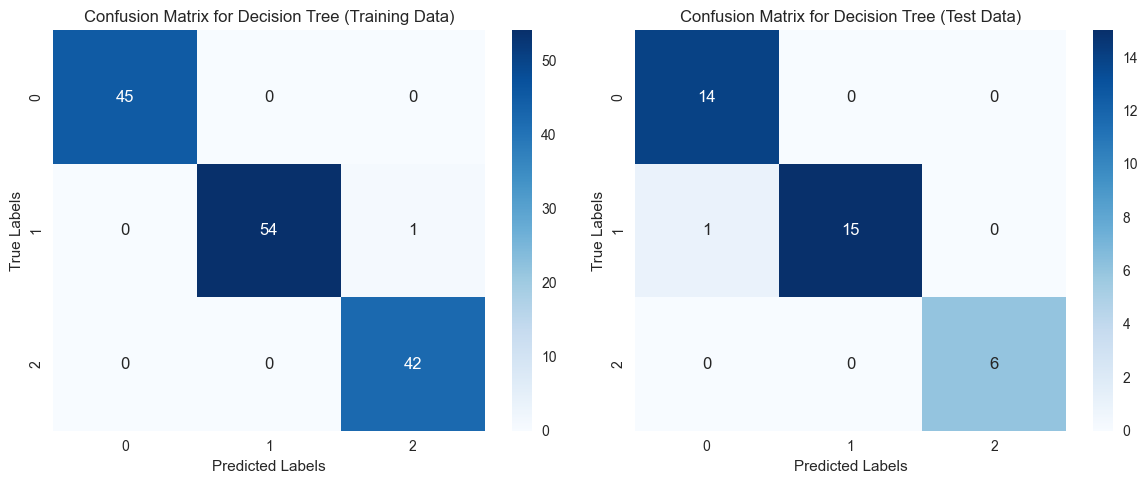

In [25]:
# Train Decision Tree Classifier
dt.fit(X_train, Y_train)

# Make predictions for both training and test data
y_predict_dt_train = dt.predict(X_train)
y_predict_dt_test = dt.predict(X_test)

# Plot confusion matrix for training data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Confusion Matrix for Decision Tree (Training Data)')
sns.heatmap(confusion_matrix(Y_train, y_predict_dt_train), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Plot confusion matrix for test data
plt.subplot(1, 2, 2)
plt.title('Confusion Matrix for Decision Tree (Test Data)')
sns.heatmap(confusion_matrix(Y_test, y_predict_dt_test), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()

# # Print classification report for Decision Tree
# print("Classification Report for Decision Tree (Test Data)")
# print(classification_report(Y_test, y_predict_dt_test))







In [26]:
# TO DO: Print classification report
from sklearn.metrics import classification_report
print("Classification Report for Decision Tree (Validation Data)")
print(classification_report(Y_test, y_predict_dt))



Classification Report for Decision Tree (Validation Data)
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



## Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2?
1. In this case, is maximizing precision or recall more important? Why?


<font color='Green'><b>YOUR ANSWERS HERE</b></font>

## How do the training and validation accuracy change depending on the method used? Explain with values.
The training and validation accuracy change depending on the model utilized and also the metric used to quantify it. In part 2 of this lab we looked at the SVC and the decision tree model implementation on the wine dataset we got online. The SVC model on this data set gave a training accuracy of 0.703743 and a validation accuracy of 0.663492. The decision tree gave a training accuracy of 0.974756 and a validation accuracy of 0.893175. This demonstrated that the decision tree performed better on the training and validation data sets. This signifies the decision tree did not necessarily over fit the test dataset or underfit it either since it has a high training accuracy. That being said the SVC model gave a training accuracy that was reasonably high and a validation accuracy that was slightly lower. Thus the SVC was less fit than the decision tree.

## What are two reasons why the support vector machines model did not work as well as the tree-based model?
The SVC model works by essentially splitting the feature vectors into regions of the vector where it is classified by a certain region of space respective to the model's predictive outcome. However, decision trees goes through several feature classifications until a value is determined. Thus the choice of the model depends on the dataset. SVM could have potentially worked better if better selection of hyper parameters were chosen such as the C parameter, the choice of kernel, and the gamma variable. Decision trees are easier to set up to get working faster and in a more interpretable way. This may be why at first set up the decision trees performed better. That being said perhaps if we tweaked the parameters more the outcome would be better. The larger the dataset the harder SVM models are to generate due to massive amounts of features and then very fine tuning requried for the hyperparameters. Another potential cause of this is an imbalance in data sets between classes. This could cause an inaccurate model to be made with the SVM which requires much more data and better computation. Additionally a third reason could be due to noise within the data which affects the SVM model more than the tree-based models.

## How many samples were incorrectly classified in step 5.2?
In step 5.2, 1 sample was incorrectly classified out of 36 samples. It labeled it as wine #0 when it was actually #1.

## In this case, is maximizing precision or recall more important? Why? 
In this case for classification of wine I think its most important to maximize precision. This would minimize the amount of false positives. Where positive is correctly categorizing the type of wine and negative is incorrectly categorizing the type of wine. This is important depending on the scenario. Maximizing recall minimizes the amount of false negatives. It is more important to reduce the amount of false positives to ensure that proper categorization is occurring when classifying the wine.

## Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?



<font color='Green'><b>DESCRIBE YOUR PROCESS HERE</b></font> 
## Where did you source your code?
I sourced my code from the labs with regards to making the heat map and I looked at the sklearn documentation to find more information about SVC. I also referred to the lecture slides for the tree-model and the SVC.

## In what order did you complete the steps?
I completed the steps in the order they were given since its necessary to fit the model from a dataset prior to being able to make a heat map (confusion matrix) from the predicted values of a test set. 

## If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
I did not use generative AI for this code segment, a lot of the code was similar to previous examples.

## Did you have any challenges? If yes, what were they? If not, what helped you to be successful? 

I struggled finding out what the precision and recall metrics were however, I referred to the lecture slides to find more information about them. I also faced challenges importing the data set originally and figured out a way to do it with Python and then load it. 

# **Part 3: Observations/Interpretation (3 marks)**

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.

<font color='Green'><b>
ADD YOUR FINDINGS HERE
</b></font>

A pattern I see in the results is that not always the more complex and intricate model will yield the best and most accurate model. Often, more intricate models require more fine tuning to yield better results. This is evident through the comparison of the SVC and decision tree. The decision tree is a significantly simpler model however, it did better. In my opinion this could be attributed to the necessity of hyperparameter tuning in SVC which is not as important in the tree-model. The SVC model on this data set gave a training accuracy of 0.703743 and a validation accuracy of 0.663492. The decision tree gave a training accuracy of 0.974756 and a validation accuracy of 0.893175.
Another pattern seen in this lab is that it takes time to fine tune models and they cannot simply be discarded at first glance. This was evident with the first exercise. In this example, the gradient boosting was better than the other examples because it had an R2-score that is 0.4737008698990578 on the validation dataset and the training R2-score was very high at 0.9864362663137645. This demonstrates that the right model depends on the parameters used for it, its relevance to the dataset type, and also the precision of noise. These factors are crucial to take into account when creating a model. Often times, we must balance out under and over fitting through tweaking parameters. 

## **Part 4:** Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.

I loved this lab because it gave us hands on examples creating models and confusion matrices to present the information. I found it motivating to learn more about machine learning. I would love to create a bigger project with assignment guidance on facial recognition or larger topics. I really enjoy these assignments :) . 

<font color='Green'><b>
ADD YOUR THOUGHTS HERE
</b></font>

## **Part 5:** Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

c:\Users\de_ro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\de_ro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\de_ro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\de_ro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\de_ro\AppData\Local\Programs\Python\Python39\lib\site-package

c:\Users\de_ro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\de_ro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\de_ro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\de_ro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\de_ro\AppData\Local\Programs\Python\Python39\lib\site-package

             Training Accuracy Validation Accuracy  Data Size
SVCLinear             0.880725            0.921746      178.0
DecisionTree          0.974756            0.893175      178.0


c:\Users\de_ro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


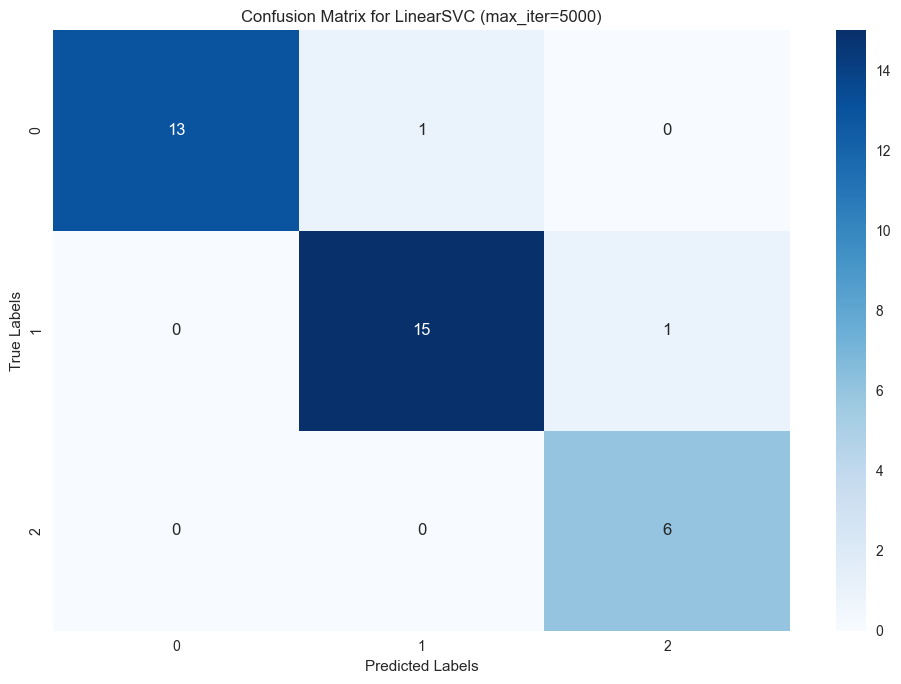

Classification Report for Linear SVC
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.94      0.94      0.94        16
           3       0.86      1.00      0.92         6

    accuracy                           0.94        36
   macro avg       0.93      0.96      0.94        36
weighted avg       0.95      0.94      0.94        36



In [27]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Instantiate models
svc = LinearSVC(max_iter=5000, random_state=0)
dt = DecisionTreeClassifier(max_depth=3, random_state=0)

# Implement the machine learning model with `X` and `y`
X = wine_df.drop('target', axis=1)
y = wine_df['target']

# Calculate the average training and validation accuracy using `cross_validate` for the two different models
SVC_results = cross_validate(svc, X, y, scoring='accuracy', return_train_score=True)
DT_results = cross_validate(dt, X, y, scoring='accuracy', return_train_score=True)

# Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
results = pd.DataFrame(columns=['Training Accuracy', 'Validation Accuracy'], index=['SVCLinear', 'DecisionTree'])

# Add the data size, training, and validation accuracy for each dataset to the `results` DataFrame
results.loc['SVCLinear', 'Training Accuracy'] = SVC_results['train_score'].mean()
results.loc['SVCLinear', 'Validation Accuracy'] = SVC_results['test_score'].mean()
results.loc['SVCLinear', 'Data Size'] = len(X)  # Adding data size for SVC

results.loc['DecisionTree', 'Training Accuracy'] = DT_results['train_score'].mean()
results.loc['DecisionTree', 'Validation Accuracy'] = DT_results['test_score'].mean()
results.loc['DecisionTree', 'Data Size'] = len(X)  # Adding data size for DecisionTree

print(results)

# Train Decision Tree Classifier and make predictions

svc = LinearSVC(max_iter=5000, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
svc.fit(X_train, y_train)
y_predict_svc = svc.predict(X_test)

# Plot confusion matrix for Decision Tree
plt.figure(figsize=(10, 7))
plt.title('Confusion Matrix for LinearSVC (max_iter=5000)')
sns.heatmap(confusion_matrix(y_test, y_predict_svc), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

# Print classification report for Decision Tree
print("Classification Report for Linear SVC")
print(classification_report(y_test, y_predict_svc))


 ## Does using `LinearSVC` improve the results? Why or why not?
Using the linearSVC improved the results when looking at the confusion matrix. This is evident because there are very few false negatives and false positives. This was a result of adding a higher iteration for the SVC model. Additionally, the training and validation accuracy are significantly better than they were before. The new accuracy values are  0.880725 and 0.921746 for training and validation respectively. Prior to this the old SVC model had the following results  respectively, 0.703743 and 0.663492. This demosntrates an increased performance. The SVC has a better performance on the validation dataset than the LinearSVC. This may suggest that it is potentially a better model now despite a slightly lower performance on the training dataset, this shows that it is not over or underfitting the model. The model only yielded 2 false positives for wines #0 and #1. 
## Is `LinearSVC` a good fit for this dataset? Why or why not?
Linear SVC is a good fit for this dataset because it demonstrates signifcant improvement that leads to very good validation performance as explained above. Perhaps tweaking the hyperparameters more could improve it or potentially examining the outliers in the dataset which could cause this. More testing with more data is necessary. That being said the Linear SVC due to the higher depth requires a hihger compute than the tree-model originally which had pretty good performance so it depends on the applicability of this dataset for larger datasets and the precision and recall required.